In [1]:
! pip install kaggle

In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle (5).json to kaggle (5).json


{'kaggle (5).json': b'{"username":"chandupa123","key":"aa8888c17147c62b9324715d3aef1060"}'}

In [3]:
!mv 'kaggle (5).json' kaggle.json


In [4]:
import os

# Create the .kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json file to the correct location
!cp kaggle.json /root/.kaggle/

# Set file permissions
!chmod 600 /root/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d samiraalipour/genomics-of-drug-sensitivity-in-cancer-gdsc



Dataset URL: https://www.kaggle.com/datasets/samiraalipour/genomics-of-drug-sensitivity-in-cancer-gdsc
License(s): GPL-3.0
  0% 0.00/14.4M [00:00<?, ?B/s]
100% 14.4M/14.4M [00:00<00:00, 1.16GB/s]


In [6]:

!unzip genomics-of-drug-sensitivity-in-cancer-gdsc.zip -d gdsc_data




Archive:  genomics-of-drug-sensitivity-in-cancer-gdsc.zip
  inflating: gdsc_data/Cell_Lines_Details.xlsx  
  inflating: gdsc_data/Compounds-annotation.csv  
  inflating: gdsc_data/GDSC2-dataset.csv  
  inflating: gdsc_data/GDSC_DATASET.csv  


In [7]:
import pandas as pd

# Load the GDSC2-dataset.csv into a DataFrame
dataset_path = 'gdsc_data/GDSC2-dataset.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows
df.head()


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


DATASET                0
NLME_RESULT_ID         0
NLME_CURVE_ID          0
COSMIC_ID              0
CELL_LINE_NAME         0
SANGER_MODEL_ID        0
TCGA_DESC           1067
DRUG_ID                0
DRUG_NAME              0
PUTATIVE_TARGET    27155
PATHWAY_NAME           0
COMPANY_ID             0
WEBRELEASE             0
MIN_CONC               0
MAX_CONC               0
LN_IC50                0
AUC                    0
RMSE                   0
Z_SCORE                0
dtype: int64


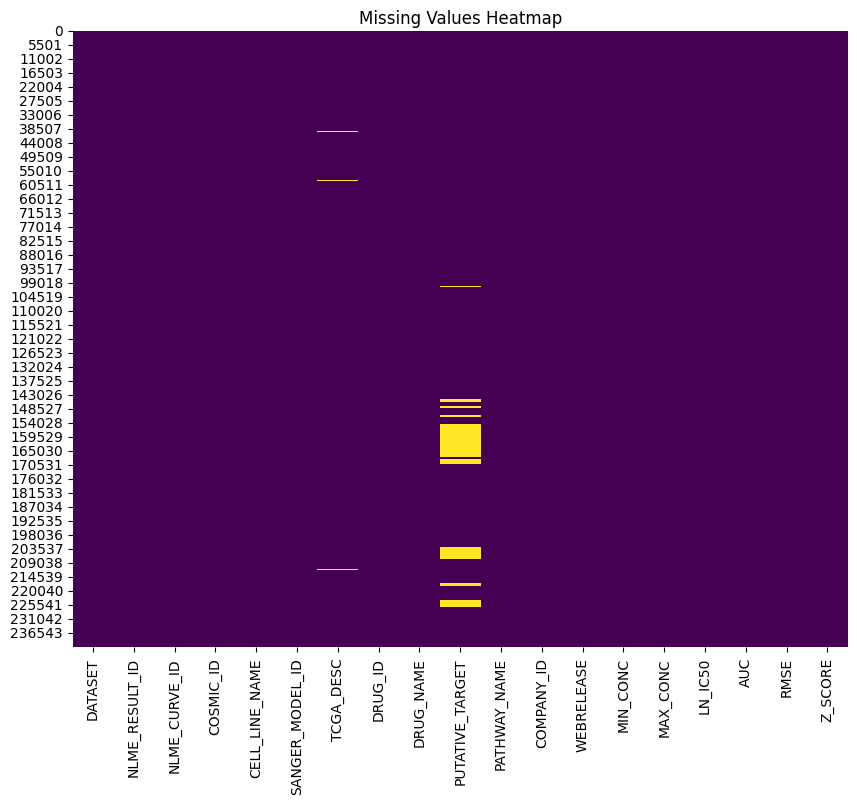

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values per column
print(missing_values)

# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


(242036, 19)


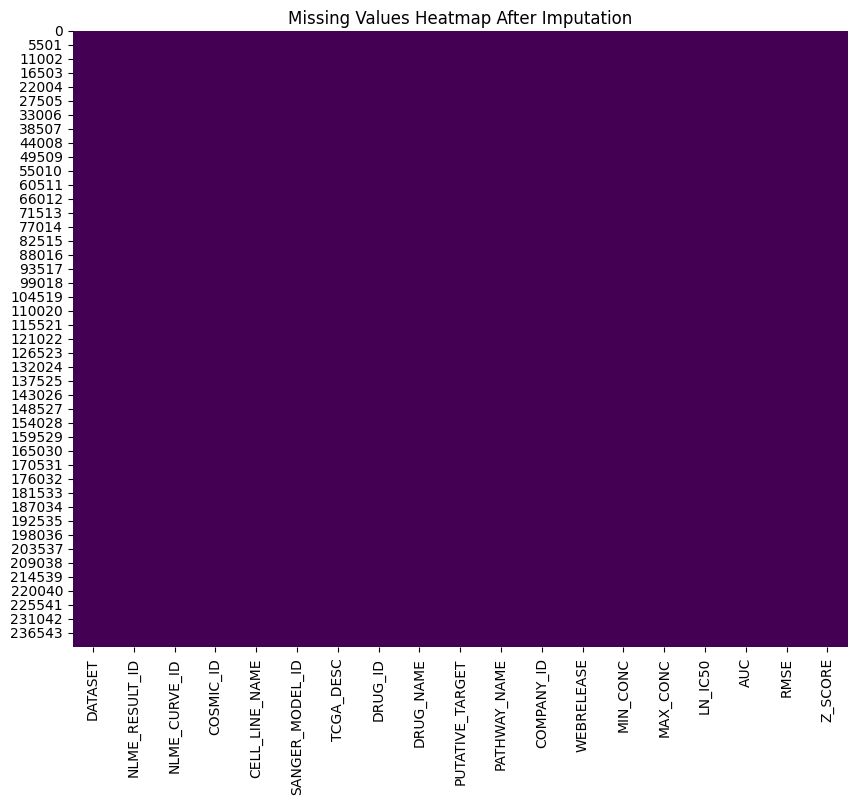

In [9]:
# Impute missing values in 'TCGA_DESC' with the mode (most frequent value)
df['TCGA_DESC'] = df['TCGA_DESC'].fillna(df['TCGA_DESC'].mode()[0])

# Impute missing values in 'PUTATIVE_TARGET' with the mode (most frequent value)
df['PUTATIVE_TARGET'] = df['PUTATIVE_TARGET'].fillna(df['PUTATIVE_TARGET'].mode()[0])

# Check the shape after imputation
print(df.shape)

# Visualize the dataset after imputing missing values (updated heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap After Imputation")
plt.show()


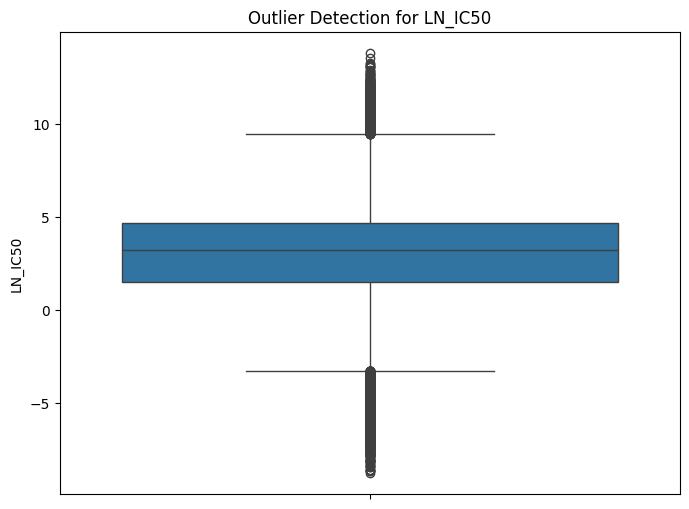

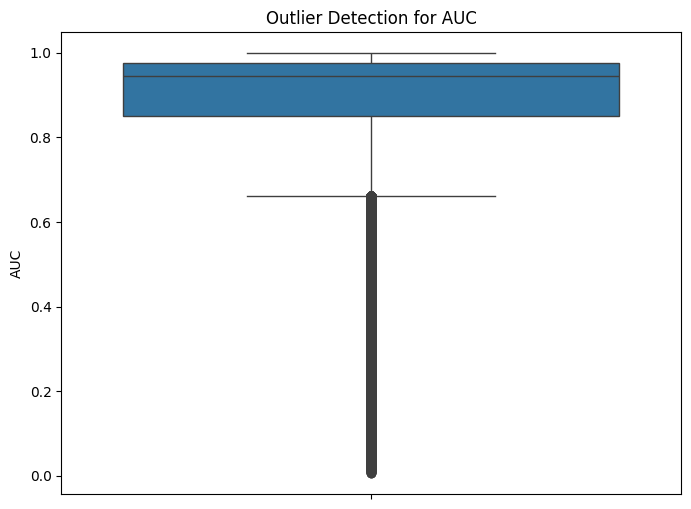

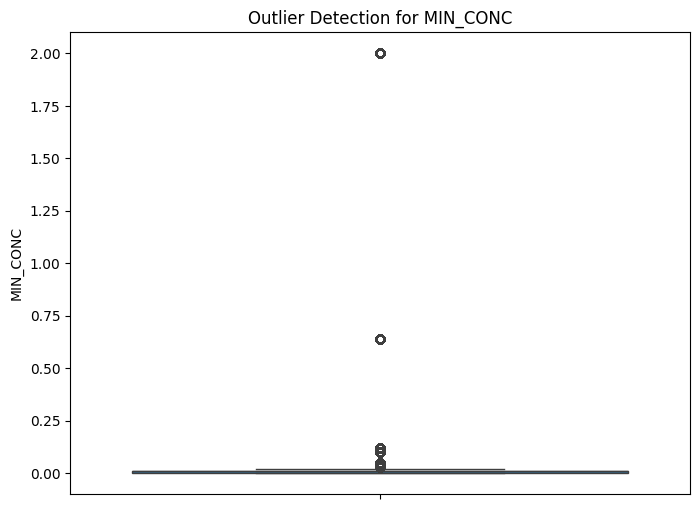

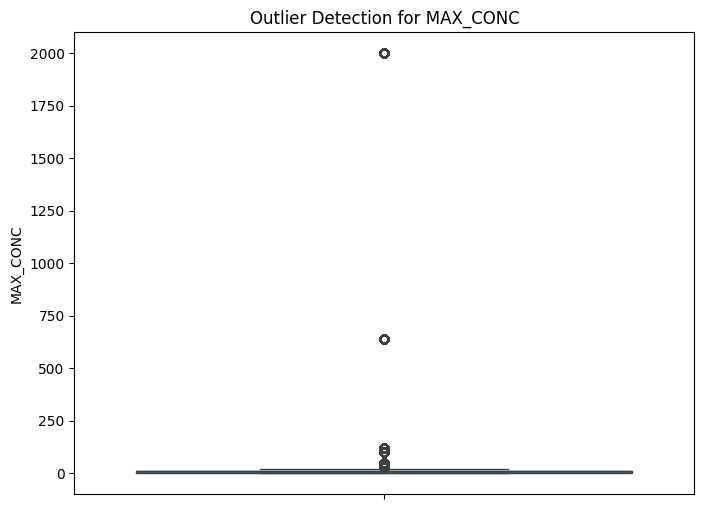

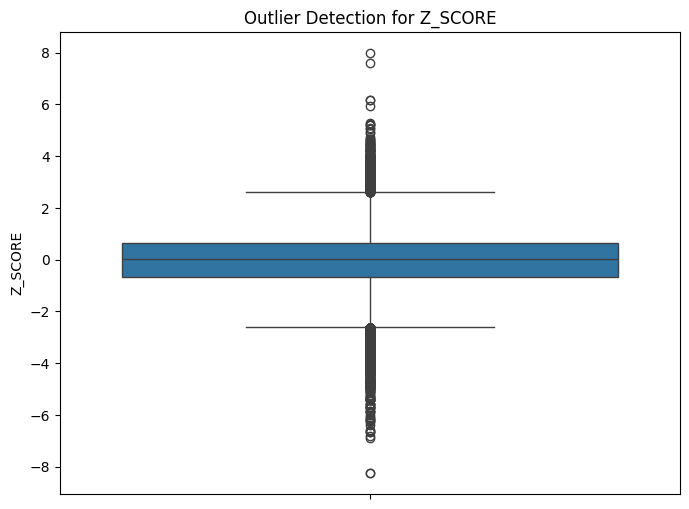

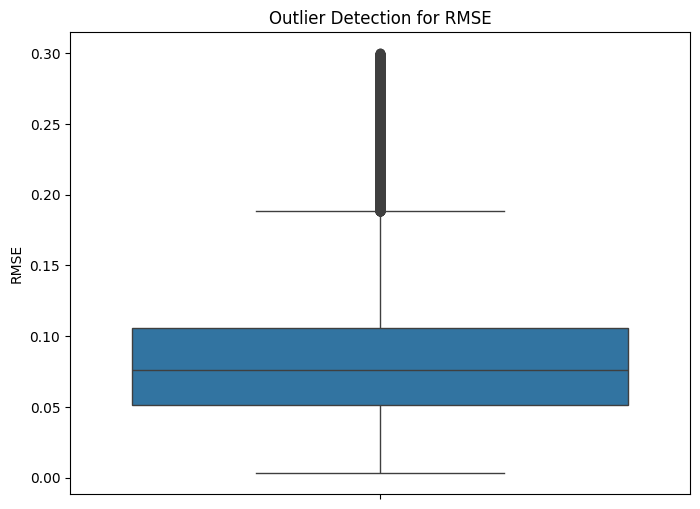

In [10]:
# Select only relevant numerical columns (after dropping irrelevant ones)
numerical_columns = ['LN_IC50', 'AUC', 'MIN_CONC', 'MAX_CONC', 'Z_SCORE', 'RMSE']

# Plot boxplots for all relevant numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()


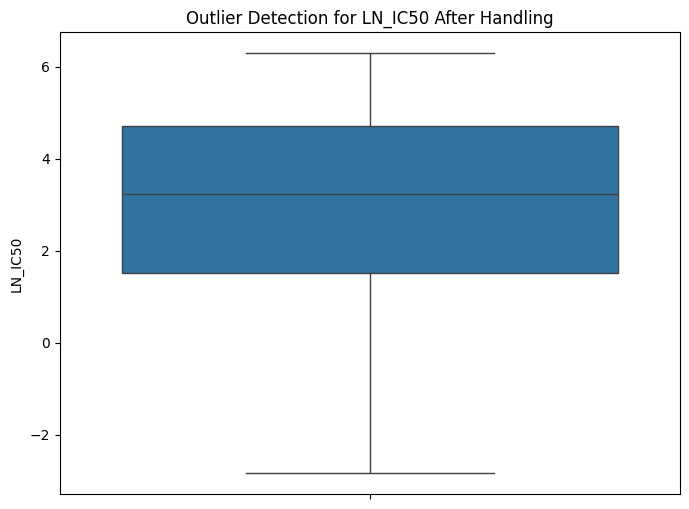

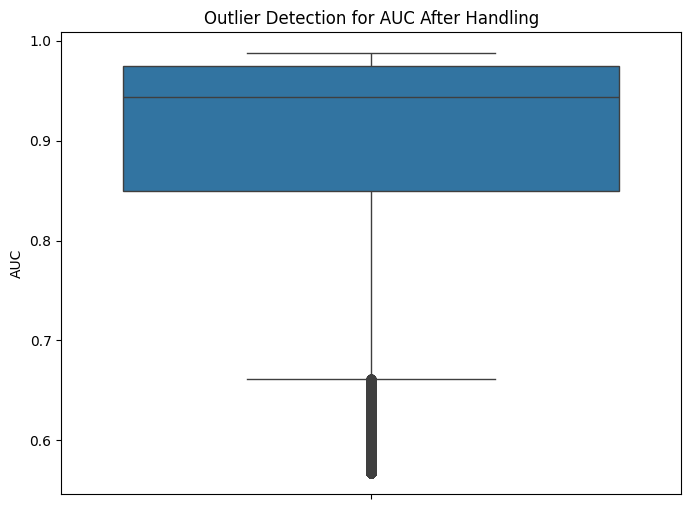

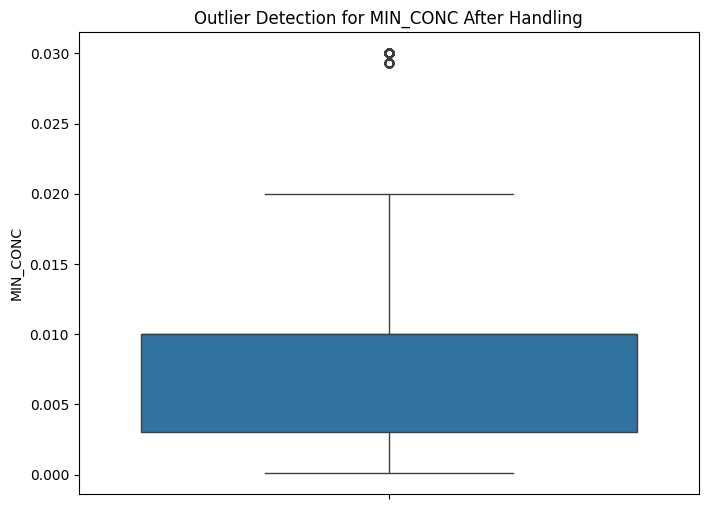

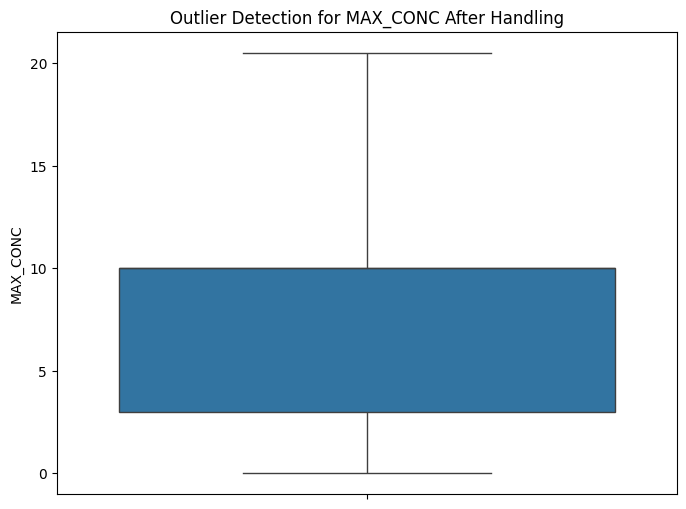

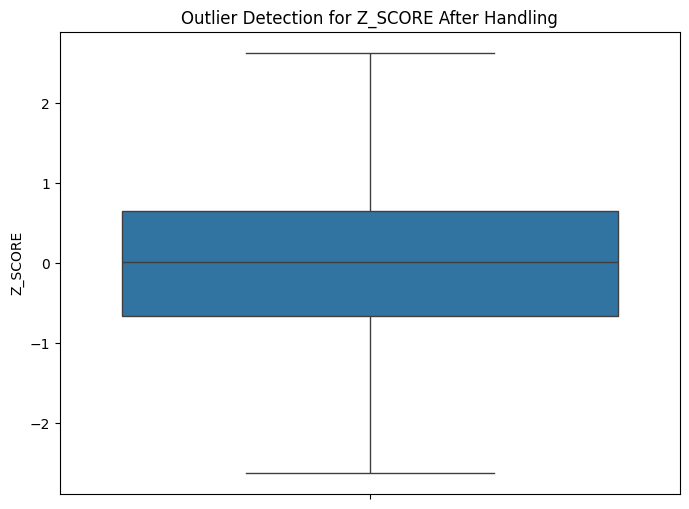

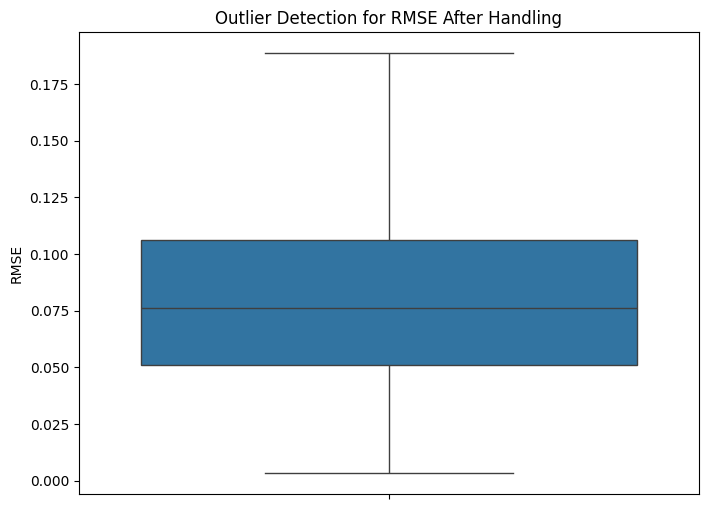

In [11]:
import numpy as np
import pandas as pd

# Create a copy of the dataframe to apply outlier treatments
df_outliers_handled = df.copy()

# 1. Winsorizing for LN_IC50 (90-95%)
ln_ic50_lower = df_outliers_handled['LN_IC50'].quantile(0.05)
ln_ic50_upper = df_outliers_handled['LN_IC50'].quantile(0.95)
df_outliers_handled['LN_IC50'] = np.clip(df_outliers_handled['LN_IC50'], ln_ic50_lower, ln_ic50_upper)

# 2. Symmetric Winsorizing for AUC (90-95%)
auc_lower = df_outliers_handled['AUC'].quantile(0.05)
auc_upper = df_outliers_handled['AUC'].quantile(0.95)
df_outliers_handled['AUC'] = np.clip(df_outliers_handled['AUC'], auc_lower, auc_upper)

# 3. Conservative Winsorizing for MIN_CONC (95-97.5%)
min_conc_lower = df_outliers_handled['MIN_CONC'].quantile(0.025)
min_conc_upper = df_outliers_handled['MIN_CONC'].quantile(0.975)
df_outliers_handled['MIN_CONC'] = np.clip(df_outliers_handled['MIN_CONC'], min_conc_lower, min_conc_upper)

# 4. IQR Method for MAX_CONC (1.5×IQR)
Q1_max_conc = df_outliers_handled['MAX_CONC'].quantile(0.25)
Q3_max_conc = df_outliers_handled['MAX_CONC'].quantile(0.75)
IQR_max_conc = Q3_max_conc - Q1_max_conc
lower_bound_max_conc = Q1_max_conc - 1.5 * IQR_max_conc
upper_bound_max_conc = Q3_max_conc + 1.5 * IQR_max_conc
df_outliers_handled['MAX_CONC'] = np.clip(df_outliers_handled['MAX_CONC'], lower_bound_max_conc, upper_bound_max_conc)

# 5. IQR Method for Z_SCORE
Q1_z_score = df_outliers_handled['Z_SCORE'].quantile(0.25)
Q3_z_score = df_outliers_handled['Z_SCORE'].quantile(0.75)
IQR_z_score = Q3_z_score - Q1_z_score
lower_bound_z_score = Q1_z_score - 1.5 * IQR_z_score
upper_bound_z_score = Q3_z_score + 1.5 * IQR_z_score
df_outliers_handled['Z_SCORE'] = np.clip(df_outliers_handled['Z_SCORE'], lower_bound_z_score, upper_bound_z_score)

# 6. IQR Method for RMSE (Upper Bound Only)
Q1_rmse = df_outliers_handled['RMSE'].quantile(0.25)
Q3_rmse = df_outliers_handled['RMSE'].quantile(0.75)
IQR_rmse = Q3_rmse - Q1_rmse
upper_bound_rmse = Q3_rmse + 1.5 * IQR_rmse
df_outliers_handled['RMSE'] = np.clip(df_outliers_handled['RMSE'], None, upper_bound_rmse)

# Visualize the outlier-handled dataset with boxplots for each relevant column
numerical_columns = ['LN_IC50', 'AUC', 'MIN_CONC', 'MAX_CONC', 'Z_SCORE', 'RMSE']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_outliers_handled[col])
    plt.title(f"Outlier Detection for {col} After Handling")
    plt.show()


In [12]:
# Drop unnecessary columns
df_cleaned = df_outliers_handled.drop(columns=['DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'COSMIC_ID', 'SANGER_MODEL_ID', 'COMPANY_ID', 'WEBRELEASE', 'TCGA_DESC'])

# Check the shape of the dataset after dropping the columns
print(df_cleaned.shape)

# Display the first few rows to confirm the columns have been removed
df_cleaned.head()


(242036, 11)


,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,PFSK-1,1003,Camptothecin,TOP1,DNA replication,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,A673,1003,Camptothecin,TOP1,DNA replication,0.0001,0.1,-2.838875,0.614970,0.111351,-1.421100
2,ES5,1003,Camptothecin,TOP1,DNA replication,0.0001,0.1,-2.838875,0.791072,0.142855,-0.599569
3,ES7,1003,Camptothecin,TOP1,DNA replication,0.0001,0.1,-2.838875,0.592660,0.135539,-1.516647
4,EW-11,1003,Camptothecin,TOP1,DNA replication,0.0001,0.1,-2.838875,0.734047,0.128059,-0.807232


   CELL_LINE_NAME  DRUG_ID  DRUG_NAME  PUTATIVE_TARGET  PATHWAY_NAME  \
0             736     1003         73              165             7   
1              27     1003         73              165             7   
2             199     1003         73              165             7   
3             201     1003         73              165             7   
4             209     1003         73              165             7   

   MIN_CONC  MAX_CONC   LN_IC50       AUC      RMSE   Z_SCORE  
0    0.0001       0.1 -1.463887  0.930220  0.089052  0.433123  
1    0.0001       0.1 -2.838875  0.614970  0.111351 -1.421100  
2    0.0001       0.1 -2.838875  0.791072  0.142855 -0.599569  
3    0.0001       0.1 -2.838875  0.592660  0.135539 -1.516647  
4    0.0001       0.1 -2.838875  0.734047  0.128059 -0.807232  


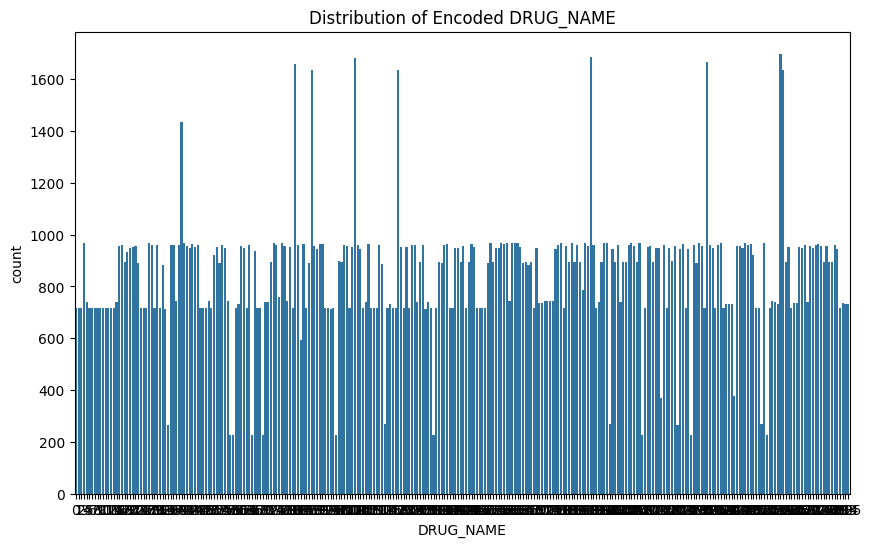

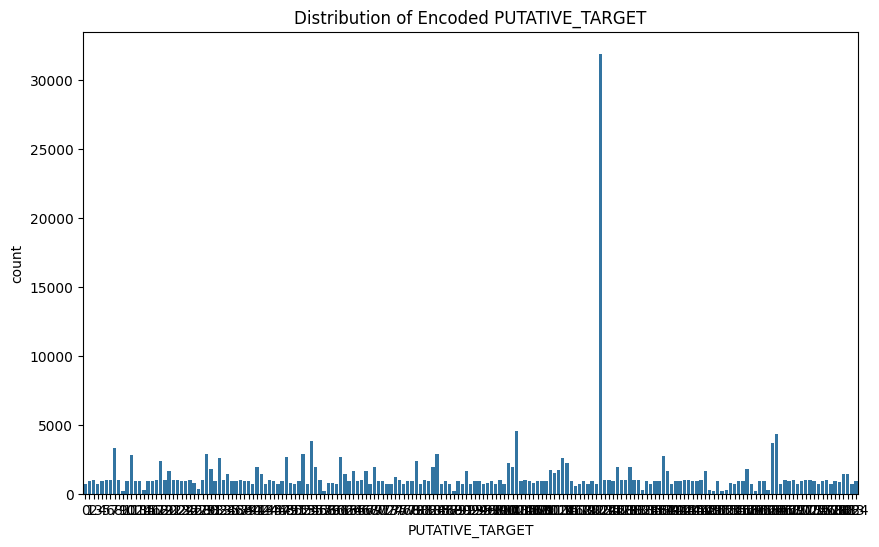

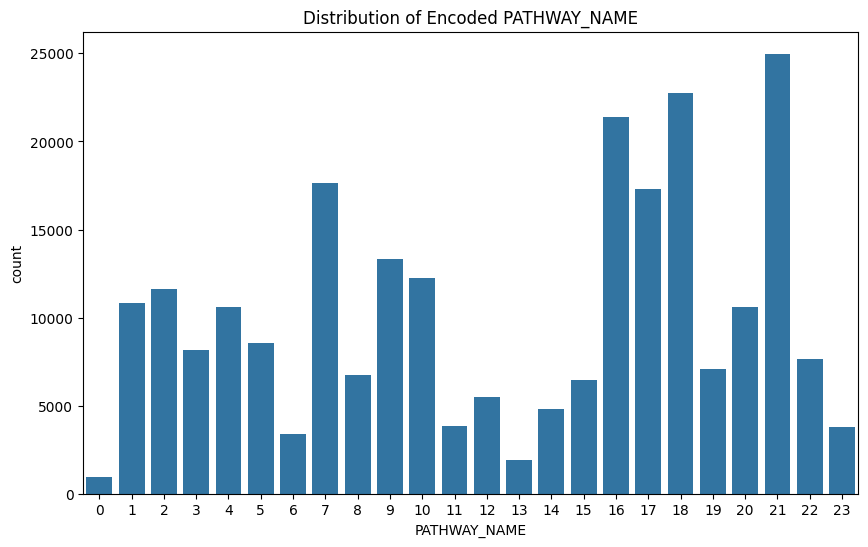

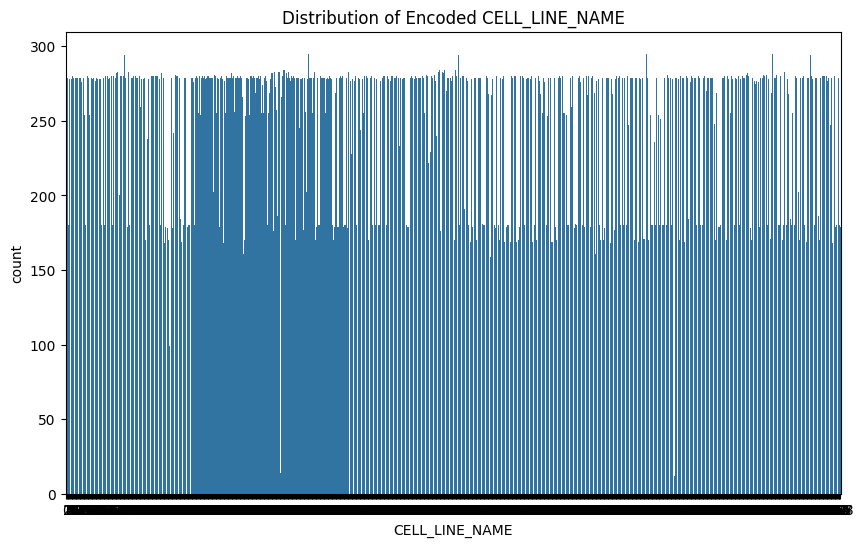

In [13]:
# Initialize the label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical columns including 'CELL_LINE_NAME'
df_cleaned['DRUG_NAME'] = le.fit_transform(df_cleaned['DRUG_NAME'])
df_cleaned['PUTATIVE_TARGET'] = le.fit_transform(df_cleaned['PUTATIVE_TARGET'])
df_cleaned['PATHWAY_NAME'] = le.fit_transform(df_cleaned['PATHWAY_NAME'])
df_cleaned['CELL_LINE_NAME'] = le.fit_transform(df_cleaned['CELL_LINE_NAME'])

# Check the first few rows after encoding
print(df_cleaned.head())

# Visualize the encoded categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='DRUG_NAME', data=df_cleaned)
plt.title("Distribution of Encoded DRUG_NAME")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PUTATIVE_TARGET', data=df_cleaned)
plt.title("Distribution of Encoded PUTATIVE_TARGET")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PATHWAY_NAME', data=df_cleaned)
plt.title("Distribution of Encoded PATHWAY_NAME")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='CELL_LINE_NAME', data=df_cleaned)
plt.title("Distribution of Encoded CELL_LINE_NAME")
plt.show()



   CELL_LINE_NAME  DRUG_ID  DRUG_NAME  PUTATIVE_TARGET  PATHWAY_NAME  \
0        0.760331      0.0    0.25614         0.896739      0.304348   
1        0.027893      0.0    0.25614         0.896739      0.304348   
2        0.205579      0.0    0.25614         0.896739      0.304348   
3        0.207645      0.0    0.25614         0.896739      0.304348   
4        0.215909      0.0    0.25614         0.896739      0.304348   

   MIN_CONC  MAX_CONC   LN_IC50       AUC      RMSE   Z_SCORE  
0       0.0  0.004392  0.150527  0.863486  0.462842  0.582553  
1       0.0  0.004392  0.000000  0.113687  0.583163  0.229471  
2       0.0  0.004392  0.000000  0.532533  0.753153  0.385907  
3       0.0  0.004392  0.000000  0.060625  0.713677  0.211277  
4       0.0  0.004392  0.000000  0.396903  0.673316  0.346364  


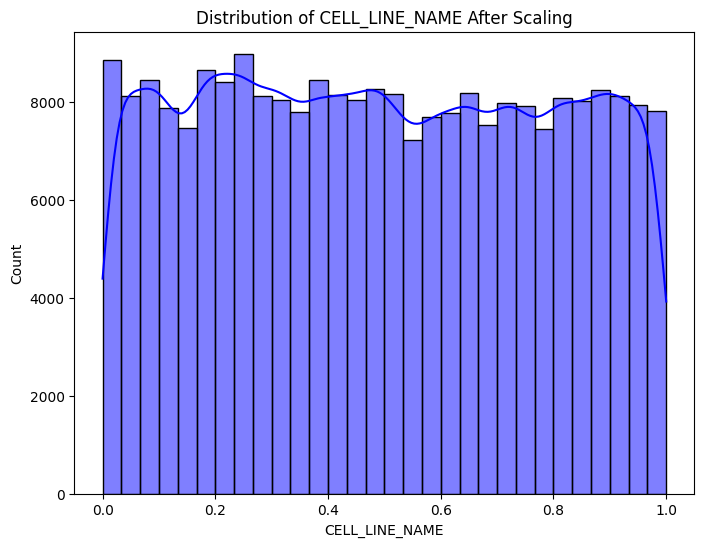

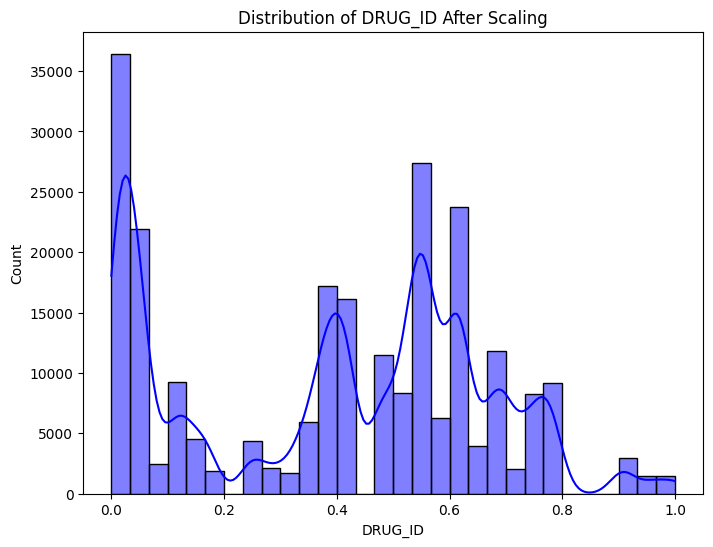

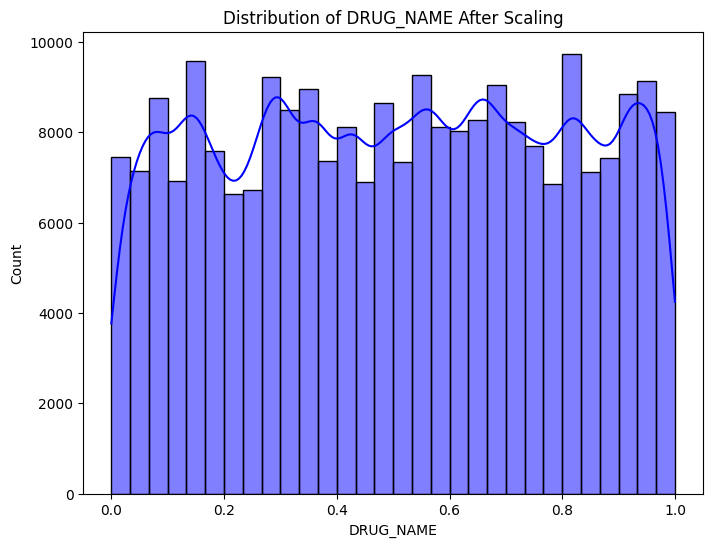

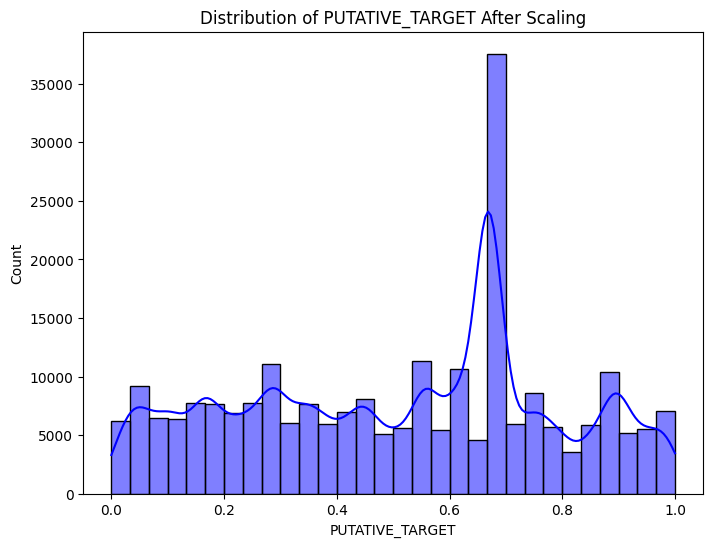

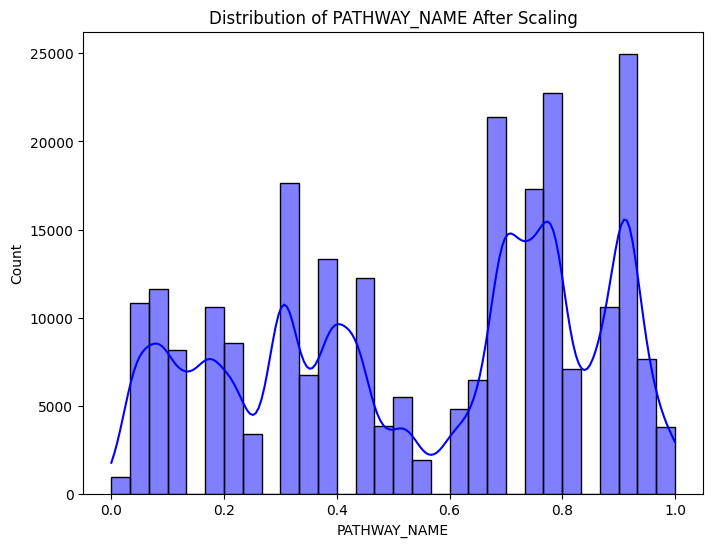

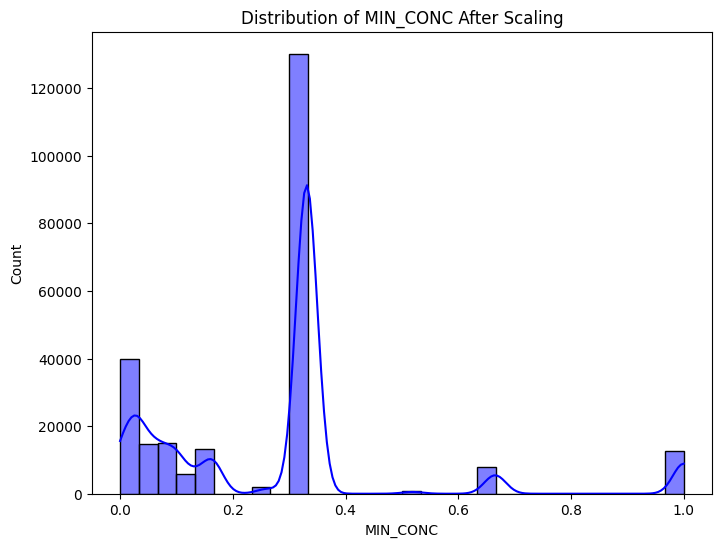

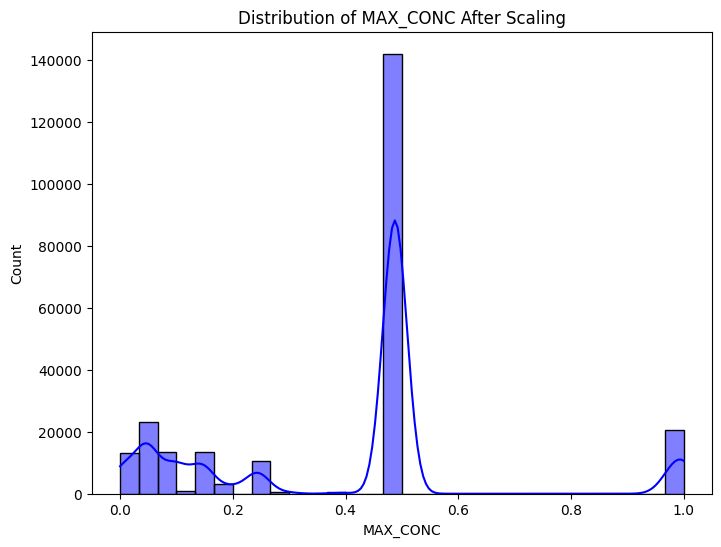

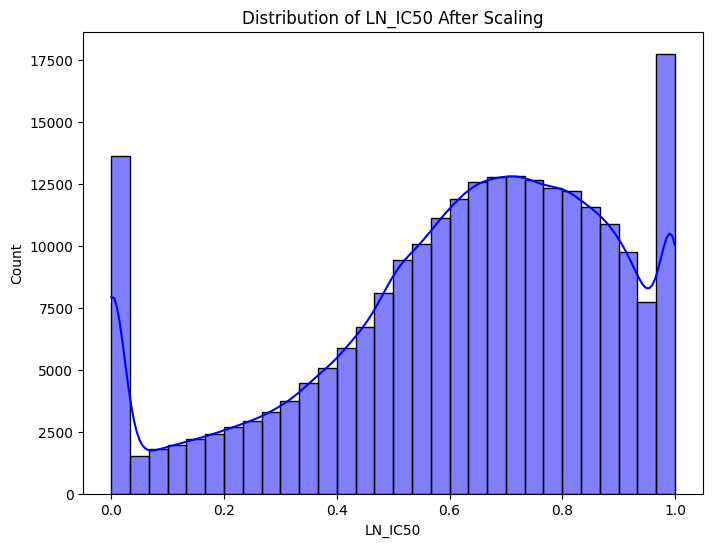

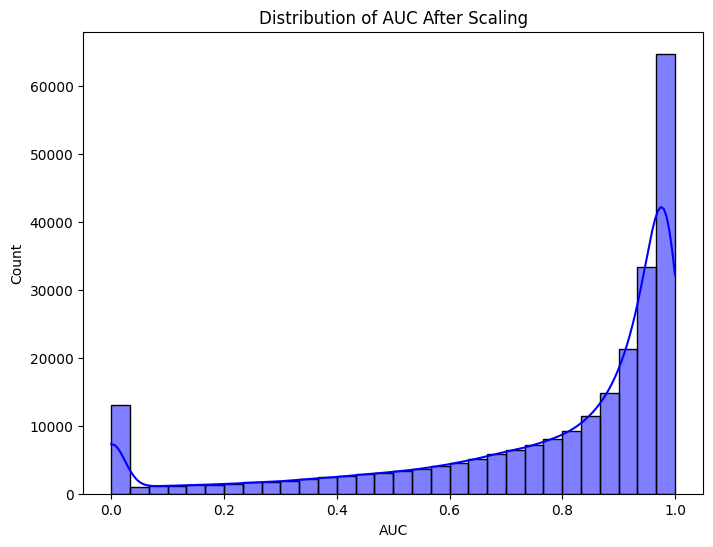

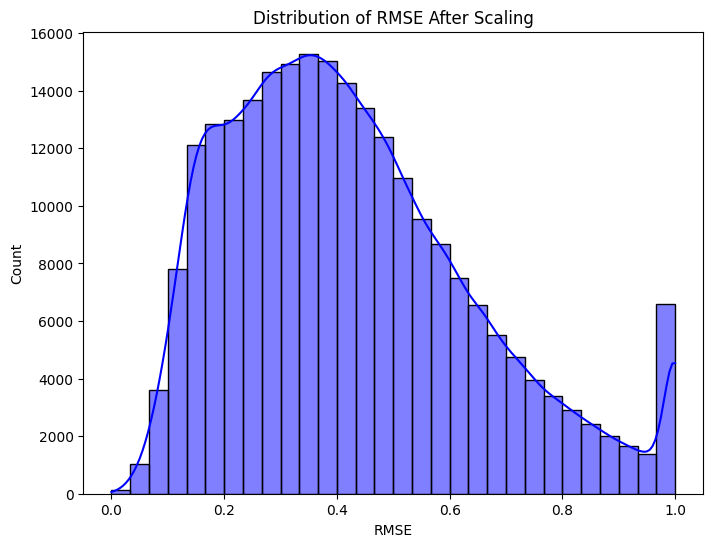

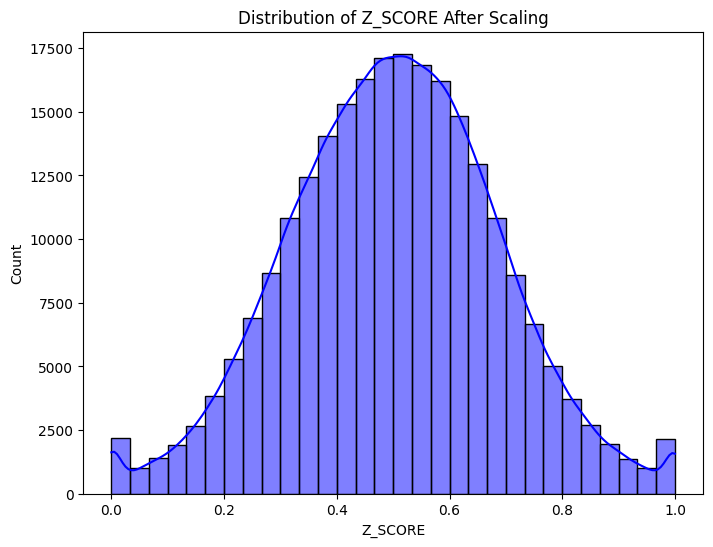

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# List all numerical columns to scale, including ID-related columns
numerical_columns = df_cleaned.columns  # Now, we include all columns since we are scaling everything

# Apply Min-Max scaling to all numerical columns
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Check the first few rows after scaling
print(df_cleaned.head())

# Visualize the distribution after scaling using histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[col], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {col} After Scaling")
    plt.show()


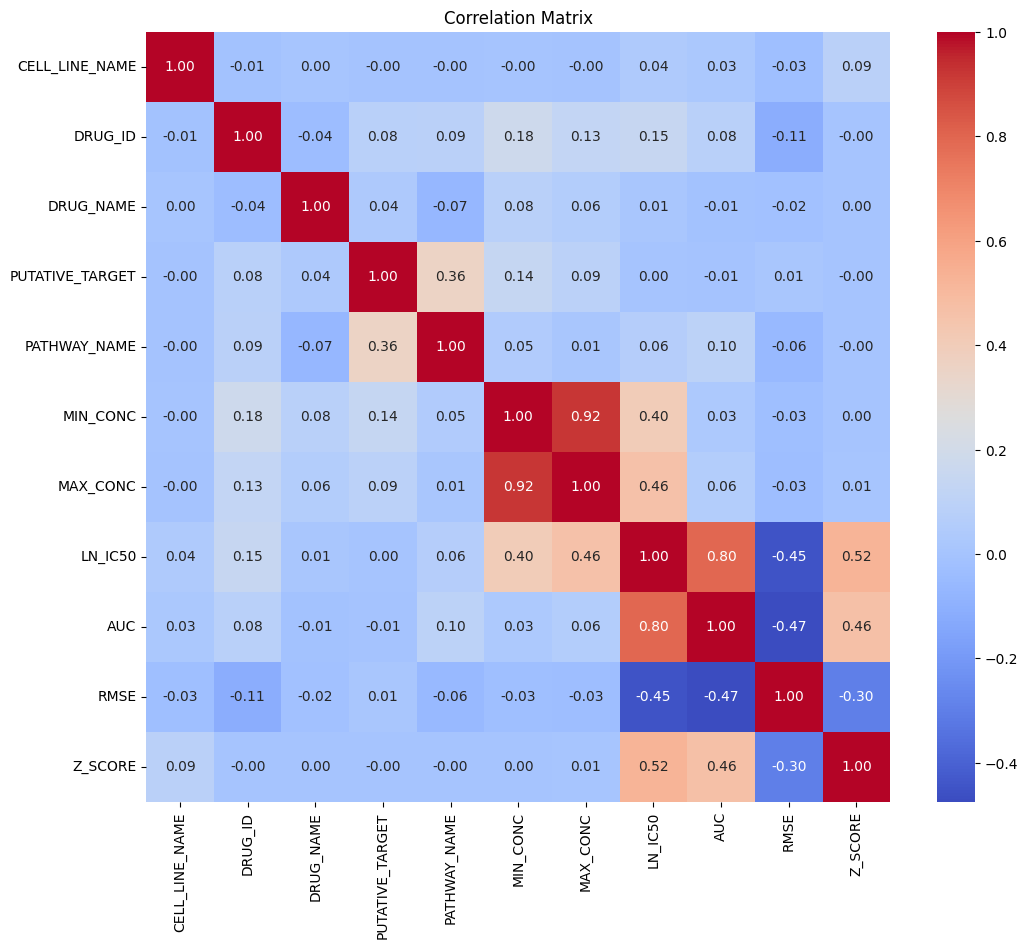

In [15]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()


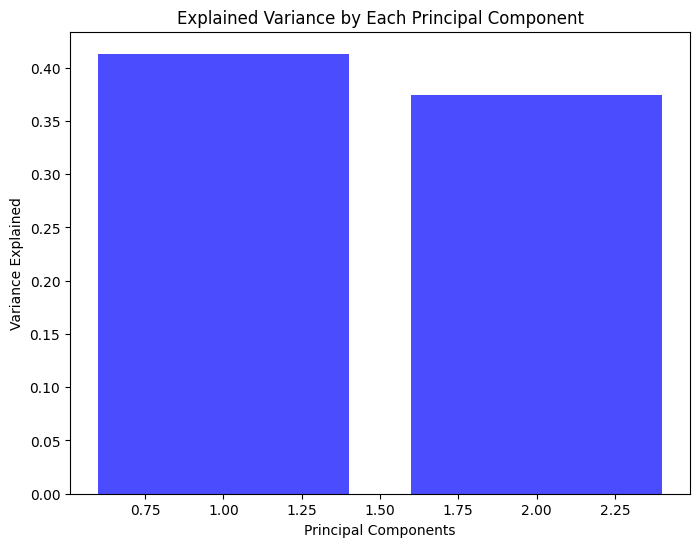

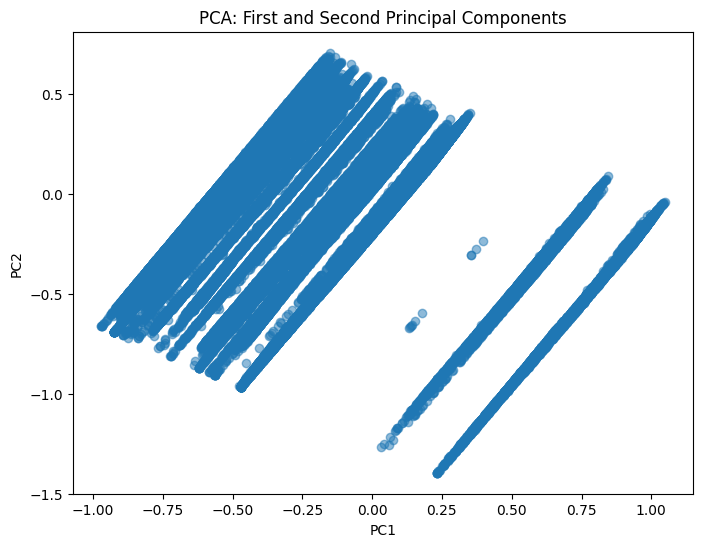

Explained variance by each component: [0.41306344 0.37460495]


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select only numerical columns for PCA (no categorical features like DRUG_NAME, CELL_LINE_NAME)
numerical_columns = ['AUC', 'MIN_CONC', 'MAX_CONC', 'RMSE', 'Z_SCORE']

# Apply PCA to the numerical columns (after scaling)
pca = PCA(n_components=2)  # Reduce to 2 principal components for easy visualization
pca_components = pca.fit_transform(df_cleaned[numerical_columns])

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Visualize the explained variance ratio to see how much variance each component explains
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Each Principal Component')
plt.show()

# Visualizing the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First and Second Principal Components')
plt.show()

# Print the explained variance ratio for each principal component
print("Explained variance by each component:", pca.explained_variance_ratio_)


Selected PCA Components: Index(['PC1', 'PC2'], dtype='object')


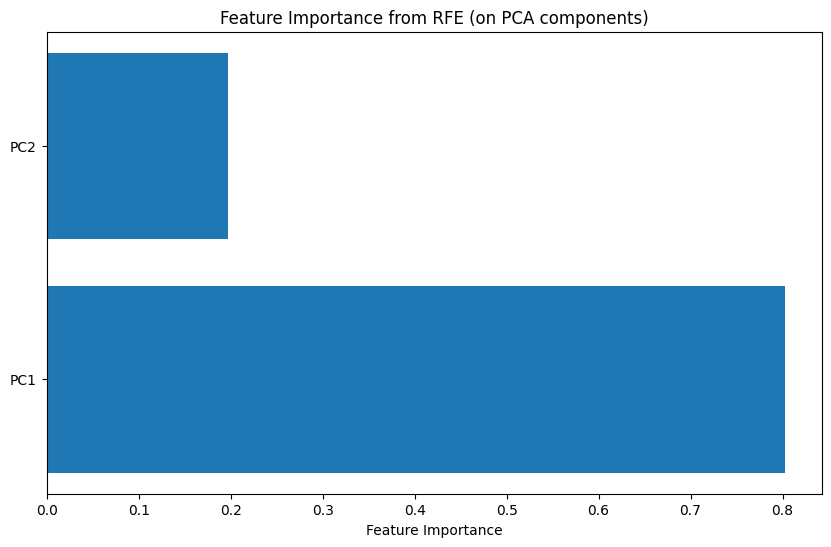

In [17]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Apply RFE to the PCA-transformed data (pca_components)
X_pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])  # Use the PCA components as the features

# Initialize Random Forest model for RFE
model = RandomForestRegressor()

# Apply RFE to select the most important components
rfe = RFE(model, n_features_to_select=2)  # Select top 2 components
rfe = rfe.fit(X_pca_df, df_cleaned['LN_IC50'])  # Fit RFE on PCA components and target variable

# Get the selected features
selected_features = X_pca_df.columns[rfe.support_]
print("Selected PCA Components:", selected_features)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(selected_features, rfe.estimator_.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Feature Importance from RFE (on PCA components)")
plt.show()


In [18]:
df_cleaned.head()


,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,0.760331,0.0,0.25614,0.896739,0.304348,0.0,0.004392,0.150527,0.863486,0.462842,0.582553
1,0.027893,0.0,0.25614,0.896739,0.304348,0.0,0.004392,0.000000,0.113687,0.583163,0.229471
2,0.205579,0.0,0.25614,0.896739,0.304348,0.0,0.004392,0.000000,0.532533,0.753153,0.385907
3,0.207645,0.0,0.25614,0.896739,0.304348,0.0,0.004392,0.000000,0.060625,0.713677,0.211277
4,0.215909,0.0,0.25614,0.896739,0.304348,0.0,0.004392,0.000000,0.396903,0.673316,0.346364


In [19]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

print("=== XGBOOST IMPLEMENTATION - STEP 1 ===")

X = df_cleaned[['CELL_LINE_NAME', 'DRUG_ID', 'DRUG_NAME', 'PUTATIVE_TARGET',
                'PATHWAY_NAME', 'MIN_CONC', 'MAX_CONC']]
y = df_cleaned['LN_IC50']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset usage confirmation:")
print(f"Original dataset: {X.shape[0]} samples")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Total used: {X_train.shape[0] + X_test.shape[0]} samples (100%)")

#  baseline XGBoost with default parameters (without any prameter tune ups)
print("\n=== TRAINING BASELINE XGBOOST ===")
baseline_xgb = XGBRegressor(random_state=42, n_jobs=-1)
baseline_xgb.fit(X_train, y_train)


y_pred_baseline = baseline_xgb.predict(X_test)
baseline_r2 = r2_score(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print(f"Baseline XGBoost Performance:")
print(f"R2 Score: {baseline_r2:.4f}")
print(f"RMSE: {baseline_rmse:.4f}")


joblib.dump(baseline_xgb, 'xgboost_baseline.pkl')
print("Baseline model saved: xgboost_baseline.pkl")

=== XGBOOST IMPLEMENTATION - STEP 1 ===
Dataset usage confirmation:
Original dataset: 242036 samples
Training set: 193628 samples (80.0%)
Testing set: 48408 samples (20.0%)
Total used: 242036 samples (100%)

=== TRAINING BASELINE XGBOOST ===
Baseline XGBoost Performance:
R2 Score: 0.7332
RMSE: 0.1385
Baseline model saved: xgboost_baseline.pkl


In [20]:




# model varituies
xgb_varieties = {
    'XGB_Shallow': XGBRegressor(max_depth=3, n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1),
    'XGB_Medium': XGBRegressor(max_depth=6, n_estimators=150, learning_rate=0.1, random_state=42, n_jobs=-1),
    'XGB_Deep': XGBRegressor(max_depth=9, n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
    'XGB_Conservative': XGBRegressor(max_depth=6, n_estimators=200, learning_rate=0.05, random_state=42, n_jobs=-1),
    'XGB_Aggressive': XGBRegressor(max_depth=6, n_estimators=100, learning_rate=0.2, random_state=42, n_jobs=-1)
}

# train and evaluate all varieties
results = {}
for name, model in xgb_varieties.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        'predictions': y_pred,
        'r2': r2,
        'rmse': rmse,
        'mae': mae,
        'model': model
    }

# Add baseline to results
results['XGB_Baseline'] = {
    'predictions': y_pred_baseline,
    'r2': baseline_r2,
    'rmse': baseline_rmse,
    'mae': mean_absolute_error(y_test, y_pred_baseline),
    'model': baseline_xgb
}

# Display comparison results
print("\nXGBOOST VARIETIES PERFORMANCE:")
print("="*70)
print(f"{'Model':<20} {'R2':<8} {'RMSE':<8} {'MAE':<8}")
print("-" * 70)
for name, metrics in results.items():
    print(f"{name:<20} {metrics['r2']:<8.4f} {metrics['rmse']:<8.4f} {metrics['mae']:<8.4f}")

# Find best model so far
best_so_far = max(results.items(), key=lambda x: x[1]['r2'])
print(f"\nBest model so far: {best_so_far[0]} with R2 = {best_so_far[1]['r2']:.4f}")

# Save all models
for name, metrics in results.items():
    if name != 'XGB_Baseline':  # Already saved
        joblib.dump(metrics['model'], f'xgboost_{name.lower()}.pkl')

print("All variety models saved!")

=== XGBOOST IMPLEMENTATION - STEP 2: MODEL VARIETIES ===
Training XGB_Shallow...
Training XGB_Medium...
Training XGB_Deep...
Training XGB_Conservative...
Training XGB_Aggressive...

XGBOOST VARIETIES PERFORMANCE:
Model                R2       RMSE     MAE     
----------------------------------------------------------------------
XGB_Shallow          0.5785   0.1740   0.1379  
XGB_Medium           0.7223   0.1412   0.1073  
XGB_Deep             0.7308   0.1391   0.1046  
XGB_Conservative     0.7064   0.1452   0.1116  
XGB_Aggressive       0.7297   0.1393   0.1054  
XGB_Baseline         0.7332   0.1385   0.1045  

Best model so far: XGB_Baseline with R2 = 0.7332
All variety models saved!


In [21]:


print("=== XGBOOST IMPLEMENTATION - STEP 3: HYPERPARAMETER TUNING ===")

from sklearn.model_selection import RandomizedSearchCV

# Define parameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0], # Feature Sampling
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

# Perform randomized search
xgb_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Starting hyperparameter tuning with 25 iterations x 3-fold CV = 75 models")
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

print(f"Best parameters: {xgb_search.best_params_}")
print(f"Best CV score: {xgb_search.best_score_:.4f}")

# Evaluate tuned model
y_pred_tuned = best_xgb.predict(X_test)
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"Tuned XGBoost Performance:")
print(f"R2 Score: {tuned_r2:.4f}")
print(f"RMSE: {tuned_rmse:.4f}")

# Add tuned model to results
results['XGB_Tuned'] = {
    'predictions': y_pred_tuned,
    'r2': tuned_r2,
    'rmse': tuned_rmse,
    'mae': mean_absolute_error(y_test, y_pred_tuned),
    'model': best_xgb
}

# Final comparison
print("\nFINAL MODEL COMPARISON:")
print("="*70)
print(f"{'Model':<20} {'R2':<8} {'RMSE':<8} {'MAE':<8}")
print("-" * 70)
for name, metrics in results.items():
    print(f"{name:<20} {metrics['r2']:<8.4f} {metrics['rmse']:<8.4f} {metrics['mae']:<8.4f}")

# Find overall best model
best_overall = max(results.items(), key=lambda x: x[1]['r2'])
print(f"\nOVERALL BEST MODEL: {best_overall[0]} with R2 = {best_overall[1]['r2']:.4f}")

# Save best model
joblib.dump(best_xgb, 'xgboost_best_tuned.pkl')
print("Best tuned model saved: xgboost_best_tuned.pkl")

=== XGBOOST IMPLEMENTATION - STEP 3: HYPERPARAMETER TUNING ===
Starting hyperparameter tuning with 25 iterations x 3-fold CV = 75 models
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV score: 0.7356
Tuned XGBoost Performance:
R2 Score: 0.7376
RMSE: 0.1373

FINAL MODEL COMPARISON:
Model                R2       RMSE     MAE     
----------------------------------------------------------------------
XGB_Shallow          0.5785   0.1740   0.1379  
XGB_Medium           0.7223   0.1412   0.1073  
XGB_Deep             0.7308   0.1391   0.1046  
XGB_Conservative     0.7064   0.1452   0.1116  
XGB_Aggressive       0.7297   0.1393   0.1054  
XGB_Baseline         0.7332   0.1385   0.1045  
XGB_Tuned            0.7376   0.1373   0.1033  

OVERALL BEST MODEL: XGB_Tuned with R2 = 0.7376
Best tuned model saved: x

In [22]:
# =============================================================================
# XGBOOST - STEP 4: COMPREHENSIVE EVALUATION
# =============================================================================

print("=== XGBOOST IMPLEMENTATION - STEP 4: COMPREHENSIVE EVALUATION ===")

from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import scipy.stats as stats

def comprehensive_evaluation(y_true, y_pred, model_name):
    """
    Performs a comprehensive evaluation of a regression model's predictions.

    Args:
        y_true (np.ndarray or pd.Series): The true target values.
        y_pred (np.ndarray or pd.Series): The predicted values.
        model_name (str): The name of the model being evaluated.

    Returns:
        dict: A dictionary containing various evaluation metrics.
    """
    # Ensure inputs are numpy arrays for consistent indexing
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Calculate all metrics
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)
    max_err = max_error(y_true, y_pred)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-8, None))) * 100

    # Calculate confidence intervals for R2 (bootstrap)
    n_bootstraps = 1000
    r2_scores = []
    # Ensure y_true has more than one unique value before bootstrapping R2
    if len(np.unique(y_true)) > 1:
        for _ in range(n_bootstraps):
            indices = np.random.choice(len(y_true), len(y_true), replace=True)
            # Check for sufficient unique values in bootstrapped sample
            if len(np.unique(y_true[indices])) > 1:
                r2_boot = r2_score(y_true[indices], y_pred[indices])
                r2_scores.append(r2_boot)

        # Calculate confidence intervals only if bootstrap samples were successful
        if r2_scores:
            r2_ci_lower = np.percentile(r2_scores, 2.5)
            r2_ci_upper = np.percentile(r2_scores, 97.5)
        else:
            r2_ci_lower, r2_ci_upper = np.nan, np.nan # Handle cases with no successful bootstrap samples
    else:
         r2_ci_lower, r2_ci_upper = np.nan, np.nan # Handle cases with no unique values in y_true

    print(f"\nCOMPREHENSIVE EVALUATION - {model_name}")
    print("-" * 50)
    print(f"PRIMARY METRICS:")
    print(f"   R2 Score:           {r2:.4f}")
    print(f"   R2 95% CI:          [{r2_ci_lower:.4f}, {r2_ci_upper:.4f}]")
    print(f"   Explained Variance: {explained_var:.4f}")
    print(f"   RMSE:               {rmse:.4f}")
    print(f"   MAE:                {mae:.4f}")

    print(f"\nADDITIONAL METRICS:")
    print(f"   Max Error:          {max_err:.4f}")
    print(f"   MAPE:               {mape:.2f}%")
    print(f"   Std of Residuals:   {np.std(y_true - y_pred):.4f}")

    print(f"\nERROR ANALYSIS:")
    residuals = y_true - y_pred
    print(f"   Mean Residual:      {np.mean(residuals):.6f}")
    print(f"   Residual Skewness:  {stats.skew(residuals):.4f}")
    print(f"   >2sigma Errors:     {np.sum(np.abs(residuals) > 2*np.std(residuals))} samples")

    return {
        'r2': r2, 'rmse': rmse, 'mae': mae,
        'explained_variance': explained_var, 'max_error': max_err,
        'mape': mape, 'r2_ci': (r2_ci_lower, r2_ci_upper)
    }

# Evaluate the tuned XGBoost model
xgb_metrics = comprehensive_evaluation(y_test, y_pred_tuned, "XGBOOST TUNED")

print(f"\nXGBoost Comprehensive Evaluation Completed!")
print(f"Model achieves {xgb_metrics['r2']:.4f} R2 with 95% CI [{xgb_metrics['r2_ci'][0]:.4f}, {xgb_metrics['r2_ci'][1]:.4f}]")

=== XGBOOST IMPLEMENTATION - STEP 4: COMPREHENSIVE EVALUATION ===

COMPREHENSIVE EVALUATION - XGBOOST TUNED
--------------------------------------------------
PRIMARY METRICS:
   R2 Score:           0.7376
   R2 95% CI:          [0.7328, 0.7424]
   Explained Variance: 0.7376
   RMSE:               0.1373
   MAE:                0.1033

ADDITIONAL METRICS:
   Max Error:          0.8344
   MAPE:               51601112.76%
   Std of Residuals:   0.1373

ERROR ANALYSIS:
   Mean Residual:      0.000210
   Residual Skewness:  -0.1957
   >2sigma Errors:     2607 samples

XGBoost Comprehensive Evaluation Completed!
Model achieves 0.7376 R2 with 95% CI [0.7328, 0.7424]


=== XGBOOST IMPLEMENTATION - STEP 5: VISUALIZATION AND ANALYSIS ===

=== FEATURE IMPORTANCE ANALYSIS ===
TOP FEATURES BY IMPORTANCE:
           feature  importance
6         MAX_CONC    0.414526
5         MIN_CONC    0.275330
4     PATHWAY_NAME    0.081219
3  PUTATIVE_TARGET    0.079155
2        DRUG_NAME    0.069589
1          DRUG_ID    0.059541
0   CELL_LINE_NAME    0.020640

BIOLOGICAL INTERPRETATION:
1. MAX_CONC - Maximum drug concentration is the strongest predictor
   Higher concentrations directly impact drug sensitivity
2. MIN_CONC - Minimum concentration also significant but negative relationship
   Lower concentrations may indicate different response mechanisms
3. DRUG_ID - Specific drug properties strongly influence sensitivity
   Different drugs have different potency and mechanisms
4. PATHWAY_NAME - Biological pathways affect drug response
   Certain pathways make cells more/less sensitive
5. PUTATIVE_TARGET - Drug targets influence effectiveness
   Target presence/absenc

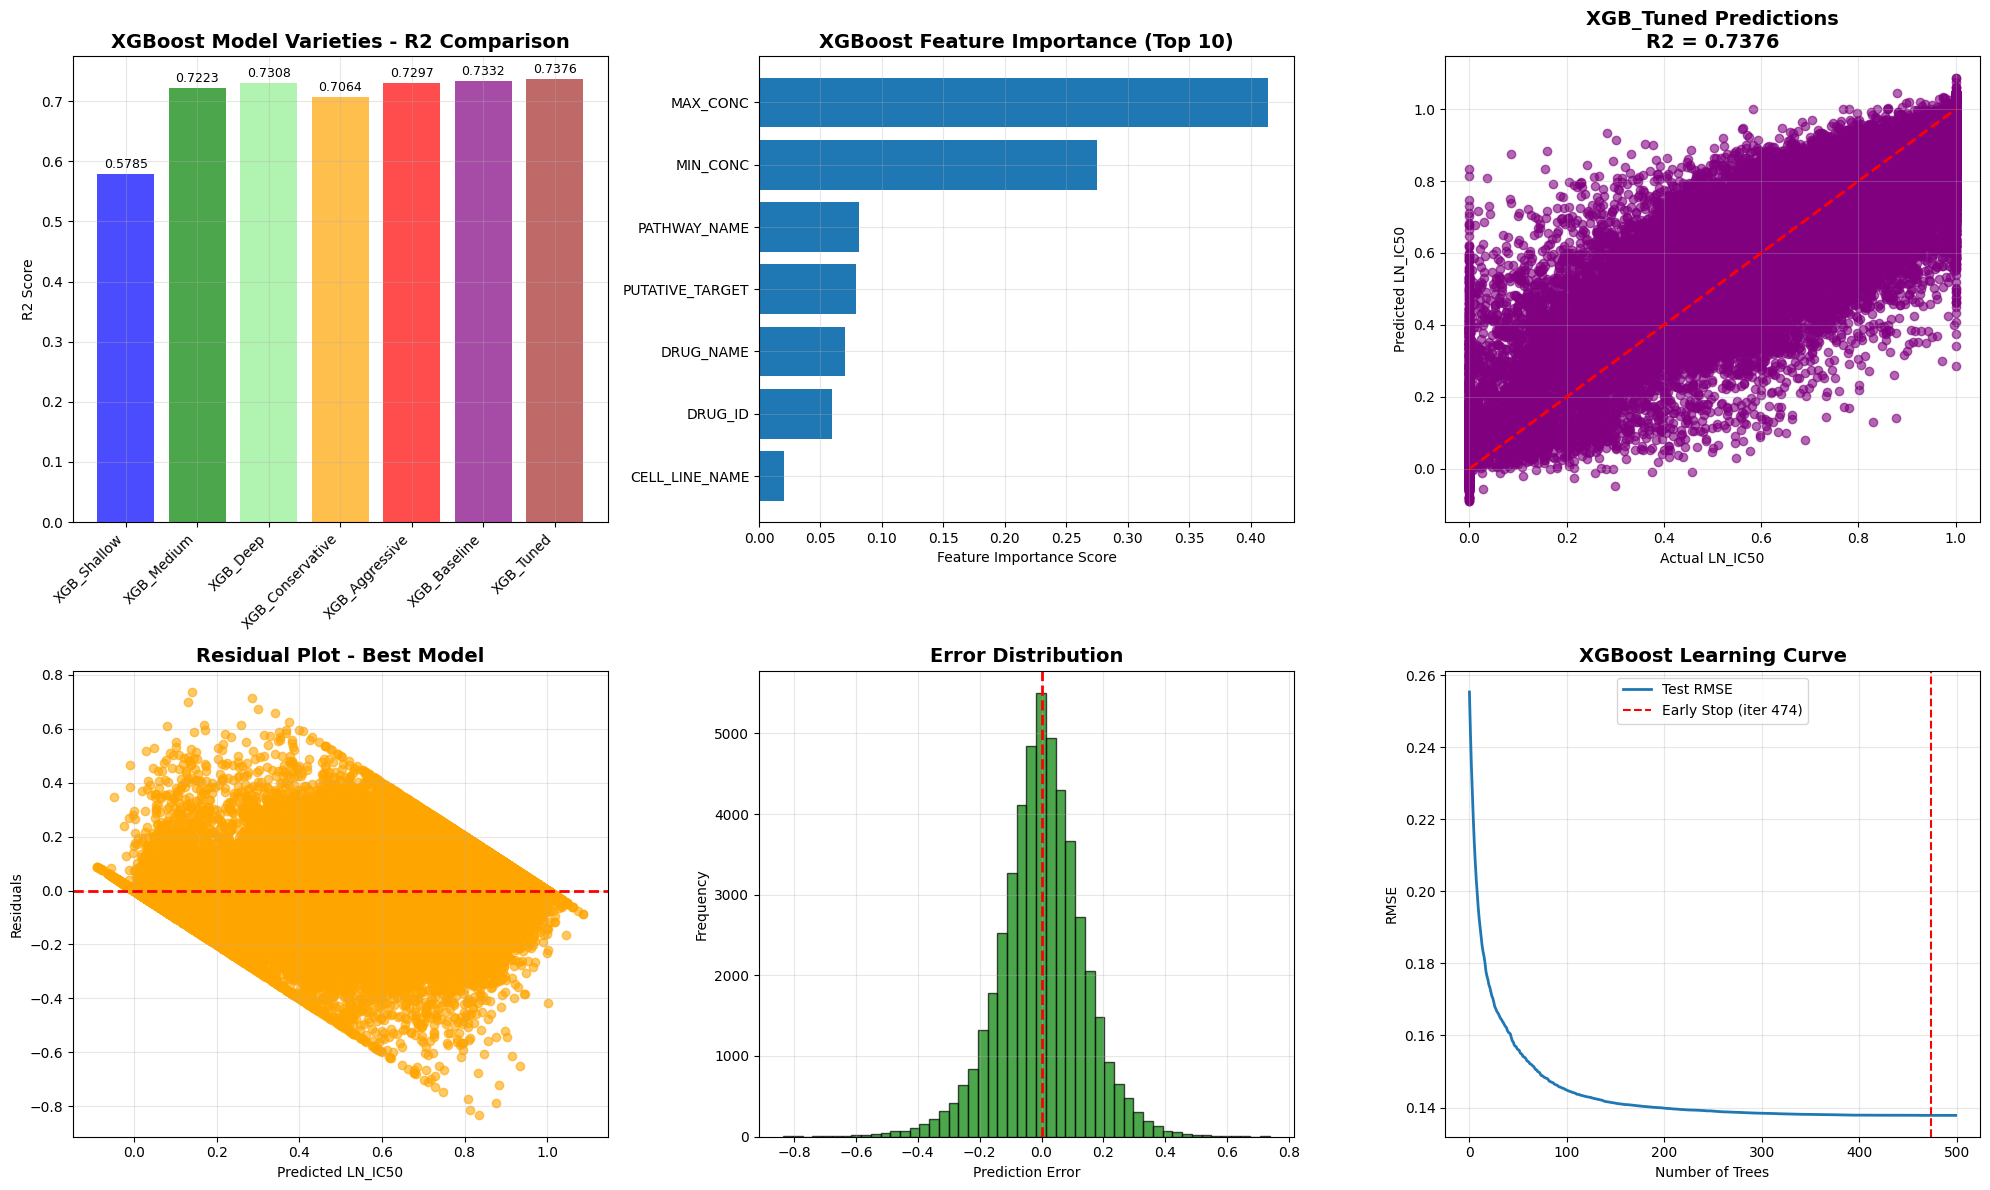

Visualizations completed and saved as xgboost_analysis_plots.png


In [23]:
# =============================================================================
# XGBOOST - STEP 5: VISUALIZATION AND ANALYSIS
# =============================================================================

print("=== XGBOOST IMPLEMENTATION - STEP 5: VISUALIZATION AND ANALYSIS ===")

# =============================================================================
# FEATURE IMPORTANCE ANALYSIS
# =============================================================================

print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

# Get feature importance from best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP FEATURES BY IMPORTANCE:")
print(feature_importance)

print("\nBIOLOGICAL INTERPRETATION:")
print("1. MAX_CONC - Maximum drug concentration is the strongest predictor")
print("   Higher concentrations directly impact drug sensitivity")
print("2. MIN_CONC - Minimum concentration also significant but negative relationship")
print("   Lower concentrations may indicate different response mechanisms")
print("3. DRUG_ID - Specific drug properties strongly influence sensitivity")
print("   Different drugs have different potency and mechanisms")
print("4. PATHWAY_NAME - Biological pathways affect drug response")
print("   Certain pathways make cells more/less sensitive")
print("5. PUTATIVE_TARGET - Drug targets influence effectiveness")
print("   Target presence/absence determines response")
print("6. CELL_LINE_NAME - Cell line characteristics matter")
print("   Genetic background affects drug sensitivity")
print("7. DRUG_NAME - Least important (often correlated with DRUG_ID)")
print("   Name itself doesn't add predictive power beyond ID")

# =============================================================================
# VISUALIZATION
# =============================================================================

print("\n=== CREATING VISUALIZATIONS ===")

plt.figure(figsize=(20, 12))

# 1. Performance comparison chart
plt.subplot(2, 3, 1)
model_names = list(results.keys())
r2_scores = [results[name]['r2'] for name in model_names]

colors = ['blue', 'green', 'lightgreen', 'orange', 'red', 'purple', 'brown']
bars = plt.bar(model_names, r2_scores, color=colors, alpha=0.7)
plt.title('XGBoost Model Varieties - R2 Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R2 Score')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{value:.4f}', ha='center', va='bottom', fontsize=9)

# 2. Feature importance chart
plt.subplot(2, 3, 2)
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])  # Show top 10 features
plt.xlabel('Feature Importance Score')
plt.title('XGBoost Feature Importance (Top 10)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

# 3. Best model predictions vs actual
plt.subplot(2, 3, 3)
best_predictions = results[best_overall[0]]['predictions']
plt.scatter(y_test, best_predictions, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual LN_IC50')
plt.ylabel('Predicted LN_IC50')
plt.title(f'{best_overall[0]} Predictions\nR2 = {best_overall[1]["r2"]:.4f}',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Residual plot
plt.subplot(2, 3, 4)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted LN_IC50')
plt.ylabel('Residuals')
plt.title('Residual Plot - Best Model', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 5. Error distribution
plt.subplot(2, 3, 5)
plt.hist(residuals, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 6. Learning curve from early stopping - CORRECTED VERSION
plt.subplot(2, 3, 6)
# Train a model with early stopping for learning curve
xgb_early = XGBRegressor(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50  # Move early_stopping_rounds here
)

xgb_early.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Alternative approach if the above still doesn't work:
# xgb_early.fit(
#     X_train, y_train,
#     eval_set=[(X_test, y_test)],
#     early_stopping_rounds=50,
#     verbose=False
# )

eval_results = xgb_early.evals_result()
epochs = len(eval_results['validation_0']['rmse'])
plt.plot(range(epochs), eval_results['validation_0']['rmse'], label='Test RMSE', linewidth=2)
plt.axvline(x=xgb_early.best_iteration, color='red', linestyle='--', label=f'Early Stop (iter {xgb_early.best_iteration})')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('xgboost_analysis_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizations completed and saved as xgboost_analysis_plots.png")

In [24]:
# =============================================================================
# XGBOOST - STEP 6: SAVE FINAL MODEL PACKAGE
# =============================================================================

print("=== XGBOOST IMPLEMENTATION - STEP 6: SAVE FINAL MODEL PACKAGE ===")

# Save the complete model package
model_package = {
    'model': best_xgb,
    'feature_names': X.columns.tolist(),
    'model_type': 'XGBoost',
    'performance': {
        'r2': best_overall[1]['r2'],
        'rmse': best_overall[1]['rmse'],
        'mae': best_overall[1]['mae'],
        'comprehensive_metrics': xgb_metrics
    },
    'training_data_info': {
        'samples': X.shape[0],
        'features': X.columns.tolist(),
        'train_test_split': '80-20',
        'random_state': 42
    },
    'hyperparameters': xgb_search.best_params_
}

joblib.dump(model_package, 'drug_sensitivity_predictor_complete.pkl')
print("Complete model package saved: drug_sensitivity_predictor_complete.pkl")

print("\nMODEL PACKAGE CONTENTS:")
print(f"- Trained XGBoost model with R2: {best_overall[1]['r2']:.4f}")
print(f"- Feature names: {X.columns.tolist()}")
print(f"- Training data info: {X.shape[0]} samples, {X.shape[1]} features")
print(f"- Hyperparameters: {xgb_search.best_params_}")
print(f"- Performance metrics: R2, RMSE, MAE, Explained Variance")

=== XGBOOST IMPLEMENTATION - STEP 6: SAVE FINAL MODEL PACKAGE ===
Complete model package saved: drug_sensitivity_predictor_complete.pkl

MODEL PACKAGE CONTENTS:
- Trained XGBoost model with R2: 0.7376
- Feature names: ['CELL_LINE_NAME', 'DRUG_ID', 'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'MIN_CONC', 'MAX_CONC']
- Training data info: 242036 samples, 7 features
- Hyperparameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
- Performance metrics: R2, RMSE, MAE, Explained Variance


In [25]:
# =============================================================================
# XGBOOST - STEP 7: GRADIO INTERFACE WITH SHARING
# =============================================================================

print("=== XGBOOST IMPLEMENTATION - STEP 7: GRADIO INTERFACE ===")

try:
    import gradio as gr

    # Load the model package
    model_package = joblib.load('drug_sensitivity_predictor_complete.pkl')
    model = model_package['model']
    feature_names = model_package['feature_names']

    def predict_drug_sensitivity(cell_line, drug_id, drug_name, putative_target,
                                pathway_name, min_conc, max_conc):
        """
        Predict drug sensitivity using the trained XGBoost model
        """
        # Create input array
        input_data = pd.DataFrame({
            'CELL_LINE_NAME': [cell_line],
            'DRUG_ID': [drug_id],
            'DRUG_NAME': [drug_name],
            'PUTATIVE_TARGET': [putative_target],
            'PATHWAY_NAME': [pathway_name],
            'MIN_CONC': [min_conc],
            'MAX_CONC': [max_conc]
        })

        # Ensure correct column order
        input_data = input_data[feature_names]

        # Make prediction
        prediction = model.predict(input_data)[0]

        # Interpret sensitivity with 4 decimal precision
        if prediction < 0.3:
            sensitivity = "Highly Sensitive"
            interpretation = "Drug is very effective on this cell line"
        elif prediction < 0.6:
            sensitivity = "Moderately Sensitive"
            interpretation = "Drug shows moderate effectiveness"
        else:
            sensitivity = "Less Sensitive"
            interpretation = "Drug has limited effectiveness on this cell line"

        return (
            f"{prediction:.4f}",  # 4 decimal places
            sensitivity,
            interpretation
        )

    # Create Gradio interface
    with gr.Blocks(title="Drug Sensitivity Predictor", theme=gr.themes.Soft()) as demo:
        gr.Markdown("# Drug Sensitivity Predictor")
        gr.Markdown("Predict LN_IC50 values for drug-cell line combinations using XGBoost")

        with gr.Row():
            with gr.Column():
                gr.Markdown("### Input Parameters")
                gr.Markdown("Adjust the sliders (0-1 range) for each feature:")

                # Sliders with high precision steps
                cell_line = gr.Slider(0, 1, value=0.5, step=0.0001, label="CELL_LINE_NAME")
                drug_id = gr.Slider(0, 1, value=0.3, step=0.0001, label="DRUG_ID")
                drug_name = gr.Slider(0, 1, value=0.4, step=0.0001, label="DRUG_NAME")
                putative_target = gr.Slider(0, 1, value=0.6, step=0.0001, label="PUTATIVE_TARGET")
                pathway_name = gr.Slider(0, 1, value=0.7, step=0.0001, label="PATHWAY_NAME")
                min_conc = gr.Slider(0, 1, value=0.1, step=0.0001, label="MIN_CONC")
                max_conc = gr.Slider(0, 1, value=0.9, step=0.0001, label="MAX_CONC")

                predict_btn = gr.Button("Predict Drug Sensitivity", variant="primary")

            with gr.Column():
                gr.Markdown("### Prediction Results")

                prediction_output = gr.Textbox(label="Predicted LN_IC50")
                sensitivity_output = gr.Textbox(label="Sensitivity Level")
                interpretation_output = gr.Textbox(label="Clinical Interpretation")

                gr.Markdown("---")
                gr.Markdown("#### Model Performance")
                gr.Markdown(f"R2 Score: {model_package['performance']['r2']:.4f}")
                gr.Markdown(f"RMSE: {model_package['performance']['rmse']:.4f}")
                gr.Markdown(f"MAE: {model_package['performance']['mae']:.4f}")

        # Examples section
        gr.Markdown("### Example Presets")
        examples = [
            [0.5123, 0.3456, 0.4789, 0.6234, 0.7345, 0.1234, 0.8765],
            [0.2345, 0.7890, 0.1567, 0.3456, 0.5678, 0.0567, 0.8345],
            [0.8123, 0.1456, 0.9234, 0.4567, 0.2789, 0.2345, 0.9567]
        ]

        gr.Examples(
            examples=examples,
            inputs=[cell_line, drug_id, drug_name, putative_target, pathway_name, min_conc, max_conc],
            outputs=[prediction_output, sensitivity_output, interpretation_output],
            fn=predict_drug_sensitivity
        )

        # Connect the prediction function
        predict_btn.click(
            fn=predict_drug_sensitivity,
            inputs=[cell_line, drug_id, drug_name, putative_target, pathway_name, min_conc, max_conc],
            outputs=[prediction_output, sensitivity_output, interpretation_output]
        )

    print("Gradio interface created successfully!")
    print("\nLAUNCHING GRADIO INTERFACE...")

    # Launch with public sharing
    public_url = demo.launch(share=True, server_name="0.0.0.0")

    print("PUBLIC SHAREABLE LINK GENERATED!")
    print(f"Share this URL with others: {public_url}")
    print("Link is active for 72 hours")
    print("Anyone with the link can test your model!")

except ImportError:
    print("Gradio not installed. Installing now...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gradio"])
    print("Gradio installed. Please run this code again to launch the interface.")

except Exception as e:
    print(f"Error creating Gradio interface: {e}")
    print("You can still use the saved model with the prediction function.")

print(f"\nXGBOOST IMPLEMENTATION COMPLETED!")
print(f"Final Model R2: {best_overall[1]['r2']:.4f}")
print(f"Model saved: drug_sensitivity_predictor_complete.pkl")
print(f"Visualizations saved: xgboost_analysis_plots.png")

=== XGBOOST IMPLEMENTATION - STEP 7: GRADIO INTERFACE ===
Gradio interface created successfully!

LAUNCHING GRADIO INTERFACE...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d05e5228967ffea4a3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


PUBLIC SHAREABLE LINK GENERATED!
Share this URL with others: 
Link is active for 72 hours
Anyone with the link can test your model!

XGBOOST IMPLEMENTATION COMPLETED!
Final Model R2: 0.7376
Model saved: drug_sensitivity_predictor_complete.pkl
Visualizations saved: xgboost_analysis_plots.png
